In [1]:
import pandas as pd
import numpy as np
import spacy
import string
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
tweet = pd.read_csv(r"C:\Users\VIRAJ KAMAT\Desktop\Data Science\Assignments\Textmining\Elon_musk.csv", encoding = 'latin1')

In [3]:
tweet.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
tweet = tweet.drop(['Unnamed: 0'], axis =1)

In [5]:
tweet = [Text.strip() for Text in tweet.Text]
tweet = [Text for Text in tweet if Text]

In [6]:
tweet[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [7]:
text = ' '.join(tweet)
len(text)

158702

In [8]:
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))

In [9]:
import nltk
from nltk.corpus import stopwords

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\VIRAJ
[nltk_data]     KAMAT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
from nltk.tokenize import word_tokenize

In [12]:
text_tokens = word_tokenize(no_punc_text)

In [13]:
print(text_tokens[0:50])

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo']


In [14]:
len(text_tokens)

21078

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\VIRAJ
[nltk_data]     KAMAT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:50])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed']


In [17]:
lower_words = [Text.lower() for Text in no_stop_tokens]
print(lower_words[0:50])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed']


In [18]:
from nltk.stem import PorterStemmer

In [19]:
stemmed_tokens = [PorterStemmer().stem(word) for word in lower_words]
print(stemmed_tokens[0:50])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde']


In [20]:
from spacy.lang.en.examples import sentences

In [21]:
nlp = spacy.load("en_core_web_sm")

In [22]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:50])

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail Himself httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed


In [23]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:50])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thank', 'flcnhvy', 'anonyx10', 'indeed']


## Feature Extraction

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(lemmas)
x

<15795x4985 sparse matrix of type '<class 'numpy.int64'>'
	with 15455 stored elements in Compressed Sparse Row format>

In [26]:
print(vectorizer.get_feature_names()[0:50])

['005', '10', '100', '1000', '10000', '107', '10x', '11', '112', '11thhour', '12', '122', '13', '130pm', '13arm13arm', '13ericralph31', '14', '140pm', '149watt', '14yearold', '15', '150', '155', '16', '162', '17', '18', '1880', '1b', '1matthewgarcia', '1st', '1stprinciples4l', '20', '200', '2007', '2008', '2009', '2012', '2017', '2020', '2021', '2024', '2026', '2030', '20k', '210', '218', '21st', '22', '225']


In [27]:
print(x.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Generate wordcloud

In [28]:
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def word_cloud(wordcloud):
    plt.figure(figsize = (40,30))
    plt.imshow(wordcloud)
    plt.axis("off");

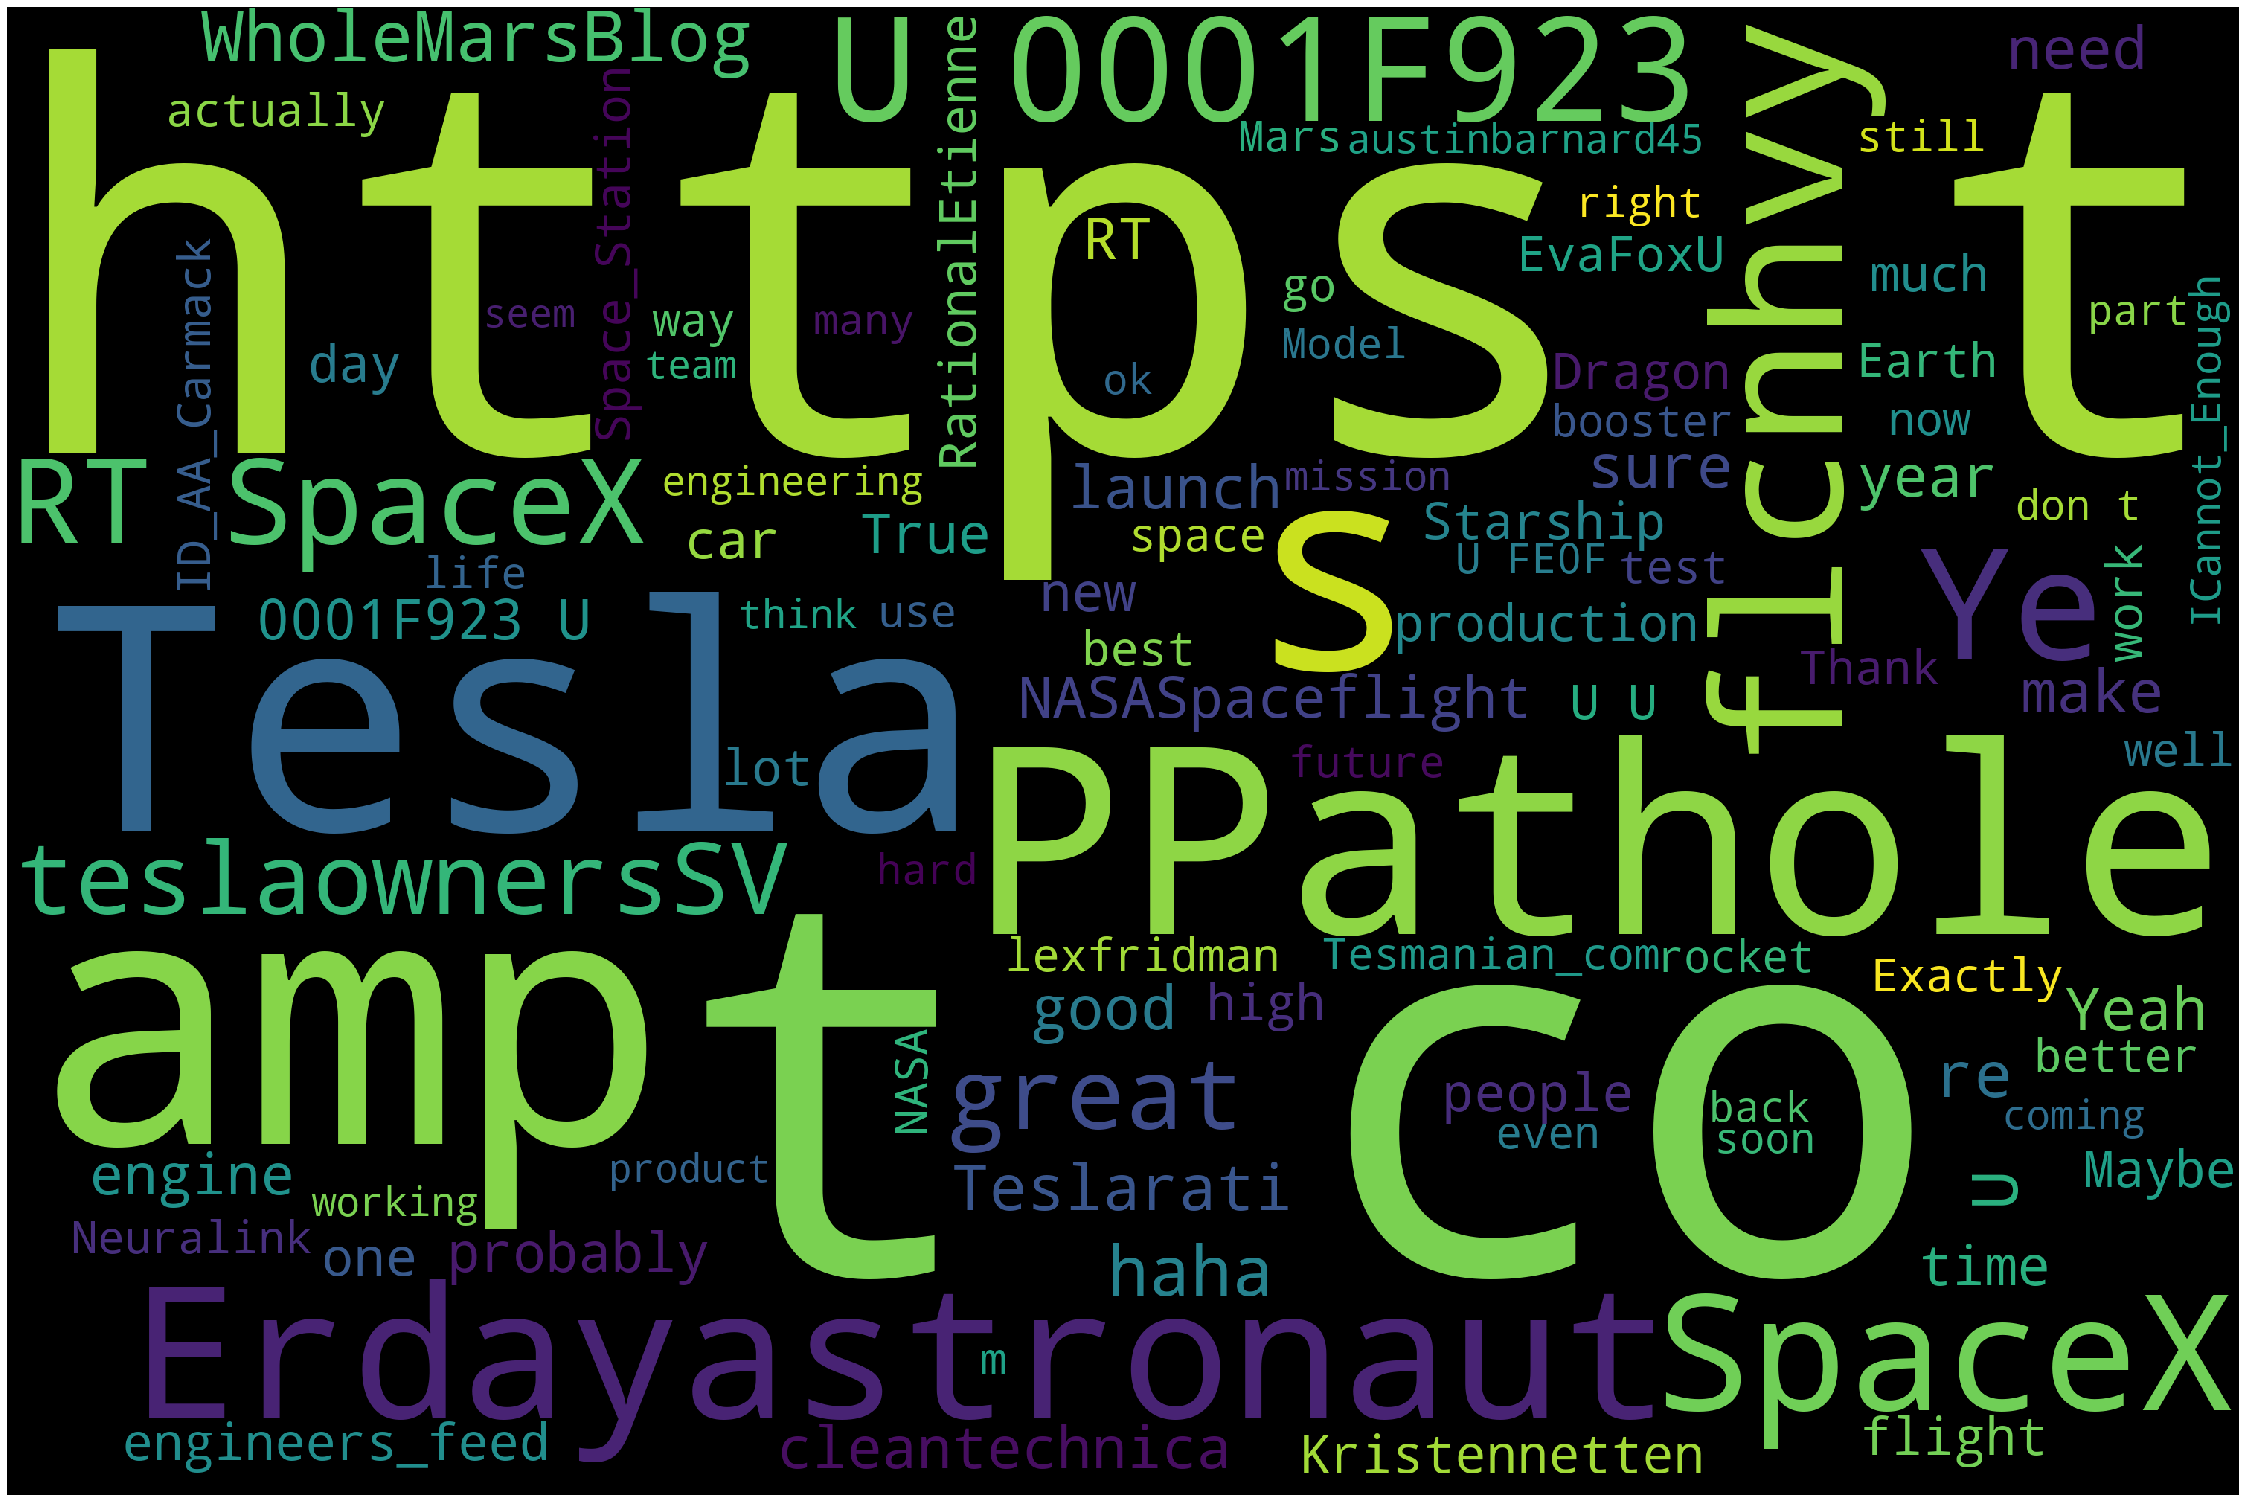

In [29]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width=3000, height=2000, background_color = 'black', max_words = 100, stopwords = stopwords).generate(text)
word_cloud(wordcloud)

## Sentiment analysis

In [30]:
afinn = pd.read_csv(r'C:\Users\VIRAJ KAMAT\Desktop\Data Science\data sets\Afinn (6).csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [31]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [32]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [33]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20, affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [34]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None) -> float:
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [36]:
sent_df = pd.DataFrame(tweet, columns=['sentence'])

In [37]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [38]:
sent_df

,sentence,sentiment_value
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated,-1
4,@teslacn Congratulations Tesla China for amazi...,4
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",-3
1995,@PPathole Make sure to read ur terms &amp; con...,1
1996,@TeslaGong @PPathole Samwise Gamgee,0
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,0


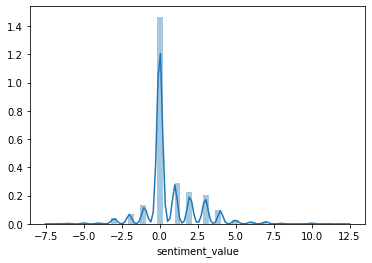

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])